# Лабораторная работа 2
## ----------------------------------------------------------------------------------------------------------------------------------
## Задание:
1. Провести классификацию найденного датасета, методом машины опорных векторов. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
dataSet = pd.read_csv('all_players.csv')

label_encoder = LabelEncoder()
dataSet['Preferred foot Encoded'] = label_encoder.fit_transform(dataSet['Preferred foot'])

non_numeric_columns = dataSet.select_dtypes(exclude=['number']).columns.tolist()

dataSet = dataSet.drop(columns=non_numeric_columns)
dataSet.dropna(inplace=True)
print(dataSet)

       Unnamed: 0  Age  Overall  Pace  Shooting  Passing  Dribbling  \
5               5   31       90    85        89       76         13   
13             13   31       89    86        85       89         21   
15             15   31       89    86        85       85         27   
22             22   30       88    86        82       91         23   
24             24   30       88    85        90       78         12   
...           ...  ...      ...   ...       ...      ...        ...   
17301        1456   20       59    57        60       54         13   
17304        1459   18       59    63        60       57         11   
17314        1469   20       57    57        59       54         21   
17319        1474   17       56    61        53       50          9   
17320        1475   20       54    55        51       50         10   

       Defending  Physicality  Acceleration  ...  Standing  Sliding  Jumping  \
5             46           90            42  ...        18       16

In [4]:
X = dataSet.drop('Preferred foot Encoded', axis=1) 
y = dataSet['Preferred foot Encoded']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Создаем словарь с параметрами для GridSearchCV
param_grid = {'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
              'C': [0.001, 0.01, 0.1, 1, 10],
              'degree': [1, 2, 3, 4, 5, 6, 7]}  # Добавляем параметр degree от 1 до 7

# Создаем объект GridSearchCV
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем GridSearch для подбора лучших параметров
svm_grid.fit(X_train, y_train)

# Получаем лучшие параметры
best_params = svm_grid.best_params_
best_kernel = best_params['kernel']
best_C = best_params['C']
best_degree = best_params['degree']

# Выводим лучшие параметры
print(f"Лучшие параметры: Ядро = {best_kernel}, C = {best_C}, Degree = {best_degree}")

Лучшие параметры: Ядро = poly, C = 0.001, Degree = 7


In [17]:
svm_model = SVC(kernel='poly', degree=7, C=0.001) 

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division = 1)

print(f'Точность модели: {accuracy}')
print(report)

stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=stratified_kfold)

print(f'Средняя точность перекрестной проверки: {cross_val_scores.mean()}')

Точность модели: 0.8823529411764706
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        46
           1       0.88      1.00      0.94       345

    accuracy                           0.88       391
   macro avg       0.94      0.50      0.47       391
weighted avg       0.90      0.88      0.83       391

Средняя точность перекрестной проверки: 0.8904552020749203


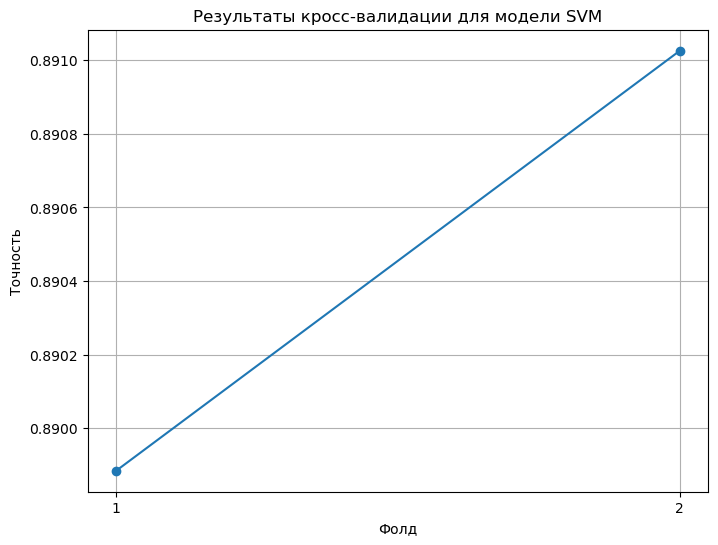

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cross_val_scores) + 1), cross_val_scores, marker='o')
plt.title('Результаты кросс-валидации для модели SVM')
plt.xlabel('Фолд')
plt.ylabel('Точность')
plt.xticks(np.arange(1, len(cross_val_scores) + 1))
plt.grid(True)
plt.show()

Из всех вышеперечисленных ядер, значений можно сделать следующие вывод. Во всех случаях точность получается ~0.87, из чего можно следующий вывод: Это означает, что модель правильно классифицировала около 87% тестовых наблюдений, т.е она правильно предсказала метку класса для примерно 87% наблюдений в тестовом наборе данных, т.е высокая точность
Также было проверены различные параметры C, из чего можно сделать вывод, что при большем C меньше точность.
Также была сделана перекрестная проверка, при оптимальном параметра C (0.1) ее значение равно ~0.89, из чего можно сделать выовд, что такое значение указывает на довольно высокую точность модели при перекрестной проверки.
Перекрестная проверка нужна, для того, чтобы оцени обобщающую способность модели, стабильность модели.